In [4]:
#Indiana Chest X-Ray Data-Set

In [5]:
path = '/gpfs/ysm/pi/krauthammer/kl533/Indiana_University_Chest_X-ray_Collection'
path_i = path + '/images'
path_r = path + '/reports'

In [103]:
from os import listdir
from collections import OrderedDict
from xml.dom import minidom
import json
from xml.etree.ElementTree import fromstring
from xmljson import Parker, BadgerFish
import matplotlib.pyplot as plt

In [8]:
reports[31]

{'eCitation': {'meta': {'@type': 'rr'},
  'uId': {'@id': 'CXR3800'},
  'pmcId': {'@id': 3800},
  'docSource': {'$': 'CXR'},
  'IUXRId': {'@id': 3800},
  'licenseType': {'$': 'open-access'},
  'licenseURL': {'$': 'http://creativecommons.org/licenses/by-nc-nd/4.0/'},
  'ccLicense': {'$': 'byncnd'},
  'articleURL': {},
  'articleDate': {'$': '2013-08-01'},
  'articleType': {'$': 'XR'},
  'publisher': {'$': 'Indiana University'},
  'title': {'$': 'Indiana University Chest X-ray Collection'},
  'note': {'$': 'The data are drawn from multiple hospital systems.'},
  'specialty': {'$': 'pulmonary diseases'},
  'subset': {'$': 'CXR'},
  'MedlineCitation': {'@Owner': 'Indiana University',
   '@Status': 'supplied by publisher',
   'Article': {'@PubModel': 'Electronic',
    'Journal': {'JournalIssue': {'PubDate': {'Year': {'$': 2013},
       'Month': {'$': 8},
       'Day': {'$': 1}}}},
    'ArticleTitle': {'$': 'Indiana University Chest X-ray Collection'},
    'Abstract': {'AbstractText': [{'@Lab

In [30]:
#Refactor:
'''
For each image save its id and store the freetext, labels.
Since each record can have several images we get each image, store its id, get the 
list of labels, and whole freetext and store it
'''
def get_text(report):
    sample = {}
    tmp_txt = ''
    #Get freetext
    for label in report['eCitation']['MedlineCitation']['Article']['Abstract']['AbstractText']:
        try:#sometimes we don't have a freetext label
            tmp_txt += "{}: {}\n".format(label['@Label'], label['$'])
        except:
            print('missing some free text labels')
    sample['radiology_report'] = tmp_txt
    #get labels
    if isinstance(report['eCitation']['MeSH']['major'],list):
        labels = []
        for label in report['eCitation']['MeSH']['major']:
            labels.append(label['$'])
        sample['labels'] = labels
    else:
        sample['labels'] = [report['eCitation']['MeSH']['major']['$']]
    return sample

samples = []
for report in reports:
    if 'parentImage' in report['eCitation']:
        #if multiple images
        if isinstance(report['eCitation']['parentImage'], list):
            for image in report['eCitation']['parentImage']:
                sample = {}
                if image['@id'] != '':
                    print('loaded {}'.format(image['@id']))
                    sample['img_id'] = image['@id']
                    sample.update(get_text(report))#pass in the report
                samples.append(sample)
        #if just one image        
        else:
            image = report['eCitation']['parentImage']
            sample = {}
            if image['@id'] != '':
                print('loaded {}'.format(image['@id']))
                sample['img_id'] = image['@id']
                sample.update(get_text(report))#pass in the report
            samples.append(sample)

loaded CXR436_IM-2076-1001-0001
missing some free text labels
loaded CXR436_IM-2076-1001-0002
missing some free text labels
loaded CXR3320_IM-1588-1001
missing some free text labels
missing some free text labels
loaded CXR3320_IM-1588-1002
missing some free text labels
missing some free text labels
loaded CXR2015_IM-0664-1001
loaded CXR2015_IM-0664-2001
loaded CXR3985_IM-2041-1001
loaded CXR3985_IM-2041-2001
loaded CXR1045_IM-0036-1001
loaded CXR1045_IM-0036-2001
loaded CXR298_IM-1369-1001
loaded CXR298_IM-1369-2001
loaded CXR481_IM-2105-1001
missing some free text labels
loaded CXR2902_IM-1306-3001
missing some free text labels
loaded CXR2902_IM-1306-4001
missing some free text labels
loaded CXR3360_IM-1613-1001
loaded CXR3360_IM-1613-1002
loaded CXR2390_IM-0944-1001
loaded CXR2390_IM-0944-1002
loaded CXR2055_IM-0693-1001
missing some free text labels
loaded CXR2055_IM-0693-2001
missing some free text labels
loaded CXR1085_IM-0059-1001
loaded CXR1085_IM-0059-2001
loaded CXR2528_IM-104

loaded CXR1776_IM-0508-2001
missing some free text labels
loaded CXR3677_IM-1830-1001
loaded CXR3677_IM-1830-2001
loaded CXR2121_IM-0747-1001
loaded CXR2121_IM-0747-2001
loaded CXR1855_IM-0555-1001
loaded CXR1855_IM-0555-2001
loaded CXR861_IM-2382-1001
loaded CXR861_IM-2382-1002
loaded CXR2786_IM-1221-1001
loaded CXR2786_IM-1221-2001
loaded CXR2200_IM-0811-1001
loaded CXR2200_IM-0811-2001
loaded CXR1230_IM-0154-0001
missing some free text labels
missing some free text labels
loaded CXR1230_IM-0154-1001
missing some free text labels
missing some free text labels
loaded CXR1230_IM-0154-2001
missing some free text labels
missing some free text labels
loaded CXR3131_IM-1473-1001
loaded CXR3131_IM-1473-2001
loaded CXR38_IM-1911-1001
loaded CXR38_IM-1911-2001
loaded CXR244_IM-0978-1001
loaded CXR2161_IM-0779-1001
loaded CXR2161_IM-0779-2001
loaded CXR3604_IM-1780-0001-0001
missing some free text labels
loaded CXR3604_IM-1780-0001-0002
missing some free text labels
loaded CXR1191_IM-0128-1001

loaded CXR1483_IM-0313-2001
missing some free text labels
loaded CXR2926_IM-1328-1001
loaded CXR2926_IM-1328-2001
loaded CXR3384_IM-1631-1001
loaded CXR3384_IM-1631-2001
loaded CXR1956_IM-0623-1001
loaded CXR1956_IM-0623-2001
loaded CXR3857_IM-1952-1001
loaded CXR439_IM-2078-1001
missing some free text labels
loaded CXR439_IM-2078-2001
missing some free text labels
loaded CXR622_IM-2204-1001
loaded CXR622_IM-2204-2001
loaded CXR3936_IM-2007-1001
loaded CXR3936_IM-2007-3001
loaded CXR2966_IM-1359-1001
loaded CXR2966_IM-1359-2001
loaded CXR3897_IM-1978-1001
loaded CXR3897_IM-1978-2001
loaded CXR1410_IM-0260-1001
loaded CXR1410_IM-0260-1002
loaded CXR484_IM-2108-1001
missing some free text labels
loaded CXR3311_IM-1586-1001
missing some free text labels
loaded CXR3311_IM-1586-3001
missing some free text labels
loaded CXR2341_IM-0907-1001
loaded CXR2341_IM-0907-2001
loaded CXR1371_IM-0239-1001
missing some free text labels
loaded CXR1371_IM-0239-2001
missing some free text labels
loaded CX

loaded CXR386_IM-1954-1001
loaded CXR386_IM-1954-4004
loaded CXR2247_IM-0844-1001
loaded CXR2247_IM-0844-2001
loaded CXR1277_IM-0185-1001
loaded CXR1277_IM-0185-2001
loaded CXR1730_IM-0481-1001
loaded CXR1730_IM-0481-1002
loaded CXR3178_IM-1498-1001
missing some free text labels
loaded CXR3178_IM-1498-2001
missing some free text labels
loaded CXR3631_IM-1798-3001
missing some free text labels
loaded CXR3631_IM-1798-4004
missing some free text labels
loaded CXR101_IM-0011-2001
missing some free text labels
loaded CXR101_IM-0011-4004
missing some free text labels
loaded CXR2661_IM-1142-1001
loaded CXR2661_IM-1142-2001
loaded CXR1691_IM-0453-1001
missing some free text labels
loaded CXR1691_IM-0453-4001
missing some free text labels
loaded CXR1356_IM-0231-1001
loaded CXR1356_IM-0231-2001
loaded CXR3592_IM-1771-1001
missing some free text labels
loaded CXR3592_IM-1771-2001
missing some free text labels
loaded CXR1829_IM-0537-1001
loaded CXR1829_IM-0537-2001
loaded CXR635_IM-2215-1001
missi

In [31]:
len(samples)

7470

In [32]:
import pandas as pd
df = pd.DataFrame(samples)

In [40]:
df

,img_id,labels,radiology_report
0,CXR436_IM-2076-1001-0001,"[Calcinosis/aorta, Hernia, Hiatal/retrocardiac...",COMPARISON: None.\nINDICATION: Dyspnea\nIMPRES...
1,CXR436_IM-2076-1001-0002,"[Calcinosis/aorta, Hernia, Hiatal/retrocardiac...",COMPARISON: None.\nINDICATION: Dyspnea\nIMPRES...
2,CXR3320_IM-1588-1001,[normal],INDICATION: preop knee replacement surgery and...
3,CXR3320_IM-1588-1002,[normal],INDICATION: preop knee replacement surgery and...
4,CXR2015_IM-0664-1001,[normal],COMPARISON: XXXX.\nINDICATION: XXXX and hypoxi...
5,CXR2015_IM-0664-2001,[normal],COMPARISON: XXXX.\nINDICATION: XXXX and hypoxi...
6,CXR3985_IM-2041-1001,[Calcified Granuloma/lung/lower lobe/left/ante...,COMPARISON: None.\nINDICATION: The patient is ...
7,CXR3985_IM-2041-2001,[Calcified Granuloma/lung/lower lobe/left/ante...,COMPARISON: None.\nINDICATION: The patient is ...
8,CXR1045_IM-0036-1001,[Deformity/ribs/right/chronic],COMPARISON: XXXX\nINDICATION: XXXX-year-old ma...
9,CXR1045_IM-0036-2001,[Deformity/ribs/right/chronic],COMPARISON: XXXX\nINDICATION: XXXX-year-old ma...


In [39]:
df['labels'].iloc[7462]

['Cardiomegaly',
 'Scoliosis/lumbar vertebrae/right/mild',
 'Scoliosis/thoracic vertebrae/right/mild',
 'Opacity/lung/base/left',
 'Pulmonary Fibrosis/base/left',
 'Cicatrix/lung/base/left']

In [61]:
#flatten number of labels, and count how many of each
labels = pd.DataFrame([item for sublist in list(df['labels']) for item in sublist])
labelCounts = labels[0].value_counts()

In [66]:
print(labelCounts.to_string())

normal                                                                2696
Lung/hypoinflation                                                     467
Lung/hyperdistention                                                   318
Cardiomegaly                                                           269
Cardiomegaly/mild                                                      245
Aorta/tortuous                                                         225
Thoracic Vertebrae/degenerative                                        212
Spine/degenerative                                                     208
Granulomatous Disease                                                  185
Technical Quality of Image Unsatisfactory                              183
No Indexing                                                            172
Thoracic Vertebrae/degenerative/mild                                   172
Atherosclerosis/aorta                                                  172
Markings/bronchovascular 

In [73]:
noduleIndex = labelCounts.index.str.contains('Nodule', regex=False)
print(labelCounts.iloc[noduleIndex])
print(labelCounts.iloc[noduleIndex].sum())

Nodule/lung/lingula                             18
Nodule/lung/lower lobe/right                    17
Nodule/lung/lower lobe/left                     17
Nodule/lung/upper lobe/right                    15
Nodule/lung/bilateral/multiple                  13
Nodule/lung/hilum/right                          8
Nodule/lung/middle lobe/right                    8
Nodule/lung/right                                7
Nodule/lung/base/right                           7
Nodule/lung/base/left                            6
Nodule/lung/upper lobe/left/multiple/small       4
Nodule/lung/scattered/multiple                   4
Nodule/lung/upper lobe/left/small                4
Nodule/thorax/left                               4
Nodule/lung/upper lobe/right/small               4
Nodule/lung/upper lobe/bilateral                 4
Nodule/lung/hilum/left                           4
Nodule/thorax/scattered/multiple/small           4
Nodule/lung/apex/right                           4
Nodule/lung/right/multiple     

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

y = pd.DataFrame(mlb.fit_transform(df['labels']),columns=mlb.classes_, index=df.index)
y


,Abdomen/enlarged/mild,Abdomen/enlarged/severe,Adipose Tissue/lung/base/right,Adipose Tissue/mediastinum,Adipose Tissue/pleura/left,Adipose Tissue/right,Airspace Disease/lung,Airspace Disease/lung/apex/left/patchy,Airspace Disease/lung/base,Airspace Disease/lung/base/bilateral,...,Tuberculosis/lung/healed,Volume Loss/lung/left,Volume Loss/lung/left/mild,Volume Loss/lung/right,Volume Loss/lung/upper lobe/left,Volume Loss/lung/upper lobe/right,Volume Loss/thorax/left,Volume Loss/thorax/left/mild,Volume Loss/thorax/right,normal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
numNormal = len(df[df.labels == 'normal'])
numAbnormal = len(df)-numNormal
print("number of normal samples: {}, number of abnormals: {}".format(numNormal, numAbnormal))

number of normal samples: 2696, number of abnormals: 4774


In [169]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import os
import torch
from skimage import io, transform
import numpy as np
import random

#xml stuff
from os import listdir
from collections import OrderedDict
from xml.dom import minidom
import json
from xml.etree.ElementTree import fromstring
from xmljson import Parker, BadgerFish
import pandas as pd
class ChestXrayDataset(Dataset):
    """Chest X-Ray image dataset from Indiana university.
        We have loaded each report, placed each image with its id, label, and freetext
        in its own row.
        Can make this dataset loaded load the images, labels, and freetext
            Should take in location of xml files, read in all of the images from xml
            and create a DF which for every row has image_id, image, freetext, labels.
    """

    def __init__(self, root_dir, suffix='.png', transform=None):
        """
        Args:
            image_df (pandas dataframe): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.path_r = self.root_dir + '/reports'
        self.path_i = self.root_dir + '/images'
        print('Loading reports')
        self.reports = self.get_reports()
        print('Getting samples')
        self.samples = self.get_samples()
        
        self.transform = transform
        self.suffix = suffix

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_name = os.path.join(self.path_i,
                                self.samples.iloc[idx, 0] + self.suffix)
        image = io.imread(img_name)
        labels = self.samples.iloc[idx, 1]
        report = self.samples.iloc[idx, 2]
        sample = {'image': image, 'report': report, 'labels': labels}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
    def get_reports(self):
        bf = BadgerFish(dict_type=dict)
        reports = []
        for file in listdir(self.path_r):
            file = path_r+'/'+file
            with open(file, "r") as xml:
                reports.append(bf.data(fromstring(xml.read())))
        return reports
    
    def get_text(self, report):
        sample = {}
        tmp_txt = ''
        #Get freetext
        for label in report['eCitation']['MedlineCitation']['Article']['Abstract']['AbstractText']:
            try:#sometimes we don't have a freetext label
                tmp_txt += "{}: {}\n".format(label['@Label'], label['$'])
            except:
                pass
                #print('missing some free text labels')
        sample['radiology_report'] = tmp_txt
        #get labels
        if isinstance(report['eCitation']['MeSH']['major'],list):
            labels = []
            for label in report['eCitation']['MeSH']['major']:
                labels.append(label['$'])
            sample['labels'] = labels
        else:
            sample['labels'] = [report['eCitation']['MeSH']['major']['$']]
        return sample
    
    def get_samples(self):
        samples = []
        for report in self.reports:
            if 'parentImage' in report['eCitation']:
                #if multiple images
                if isinstance(report['eCitation']['parentImage'], list):
                    for image in report['eCitation']['parentImage']:
                        sample = {}
                        if image['@id'] != '':
                            #print('loaded {}'.format(image['@id']))
                            sample['img_id'] = image['@id']
                            sample.update(self.get_text(report))#pass in the report
                        samples.append(sample)
                #if just one image        
                else:
                    image = report['eCitation']['parentImage']
                    sample = {}
                    if image['@id'] != '':
                        #print('loaded {}'.format(image['@id']))
                        sample['img_id'] = image['@id']
                        sample.update(self.get_text(report))#pass in the report
                    samples.append(sample)
        return pd.DataFrame(samples)
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image = sample['image']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'report': sample['report'], 'labels': sample['labels']}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image = sample['image']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        return {'image': image, 'report': sample['report'], 'labels': sample['labels']}
class RandomRotate(object):
    '''Randomly rotate the image'''
    '''
        Args:
            degrees (int): Desired rotation maximum in either direction
            reflect (boolean): Reflect image, or use black borders
            
    '''
    def __init__(self, degrees, reflect = False):
        assert isinstance(degrees, (int, float))
        self.degrees = float(degrees)
        self.rotateReflect = reflect
    def __call__(self, sample):
        image = sample['image']
        angle = random.uniform(-self.degrees, self.degrees)
        if self.rotateReflect:
            image = transform.rotate(image,angle=angle, mode='reflect')
        else:
            image = transform.rotate(image,angle=angle, mode='constant')
        return {'image': image, 'report': sample['report'], 'labels': sample['labels']}

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image = sample['image']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

In [175]:
data = ChestXrayDataset(path, suffix='.png', transform=transforms.Compose([
                                               Rescale(100),
                                               RandomRotate(15, reflect=True)]))

Loading reports
Getting samples


In [176]:
len(data)

7470

/home/kl533/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/kl533/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


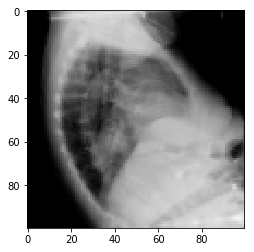

In [192]:
plt.imshow(data[0]['image'])

/home/kl533/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/kl533/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


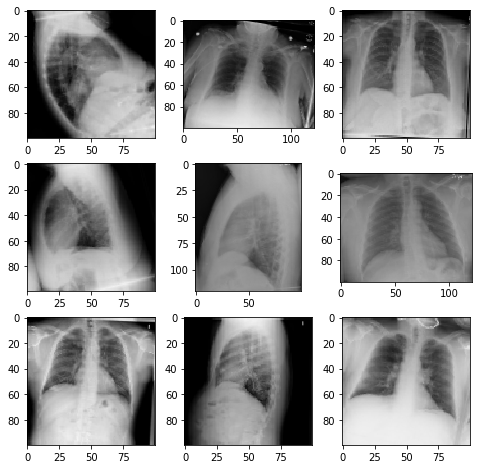

In [189]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = data[i-1]['image']
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [132]:
random.uniform(-10,10)

3.6323240754855846